# ASSIGNMENT : IRIS MULTI-CLASS CLASSIFICATION

###### Purpose :
To predict the species of flower .
###### Description :
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).
###### Requirements :
1) Code must be in tf 2.0 .

2) Accuracy must be in between 95-97% .

3) Model shouldn't be Overfit (You can add drop out layer for this) .

### STEP 1 : Load all the necessary libraries 

https://www.kaggle.com/ash316/ml-from-scratch-with-iris
http://tekshinobi.com/analyzing-iris-dataset-with-keras-and-tensorflow-machine-learning-and-data-analysis/

In [1]:
from sklearn import datasets

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

### STEP 2 : Data Preparation
This step consists of multiple sub steps from data loading [download](https://github.com/ramsha275/PIAIC-Sir-Anees-Quarter-2/blob/master/Deep%20Learning/iris.csv),shuffling ,spliting in **Train** and **Test** sets to one-hot-enconding on labels . 


<h3>Create Dataframes for features and target</h3>

In [5]:
encoder = LabelBinarizer()
seed = 42

In [6]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
iris_data_df = iris_df.loc[:, iris_df.columns != 'variety']
iris_data_df.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
variety = ['Setosa', 'Versicolor', 'Virginica']
iris_target_array = iris_df['variety'].apply(variety.index)
iris_target = np.array(iris_target_array)
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [9]:
target = encoder.fit_transform(iris_target)
target

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [10]:
# iris_target_df = pd.DataFrame({
#     'Setosa' : iris_df['variety'] == 'Setosa',
#     'Versicolor' : iris_df['variety'] == 'Versicolor',
#     'Virginica' : iris_df['variety'] == 'Virginica',
# })*1
# iris_target_df.head()
iris_target_df = pd.DataFrame(data=target, columns=variety) 
iris_target_df.head()

,Setosa,Versicolor,Virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


<h3>Create training and testing datasets</h3>

In [11]:
X_train,X_test,y_train,y_test = train_test_split(iris_data_df,
                                                 iris_target_df,
                                                 test_size=0.30,
                                                 random_state=seed)

<h3>Feature scaling.</h3>

ML algos perform best when all dataset features have the same scale. Particularly, in Neural Nets, we use MinMaxScaler with range between 0 and 1.<br>
Also, since MinMaxScalar transformation makes us lose the column and index labels, we need to recreate the dataframes for scaled data and target.

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_train.head()

,sepal.length,sepal.width,petal.length,petal.width
81,0.352941,0.181818,0.464286,0.375000
133,0.588235,0.363636,0.714286,0.583333
137,0.617647,0.500000,0.785714,0.708333
75,0.676471,0.454545,0.589286,0.541667
109,0.852941,0.727273,0.892857,1.000000


In [14]:
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
X_test.head()

,sepal.length,sepal.width,petal.length,petal.width
73,0.529412,0.363636,0.642857,0.458333
18,0.411765,0.818182,0.107143,0.083333
118,1.000000,0.272727,1.035714,0.916667
78,0.500000,0.409091,0.607143,0.583333
76,0.735294,0.363636,0.660714,0.541667


<h5>Optional micro detail:</h5>
Note that we use <b>fit_transform</b> on X_train and <b>transform</b> on X_test.<br>
It is very important that we don’t fit on test data.

### STEP 3 : Model Architecture 


###### Input : 4 
###### 1 hidden Layer : 8 nodes
###### Output : 3

<h3>Build Model </h3>

In [15]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='tanh', name='input_layer'))
model.add(Dense(10, activation='tanh', name='hidden_layer'))
model.add(Dense(10, activation='tanh', name='hidden_layer1'))
model.add(Dense(3, activation='softmax', name='output_layer'))
model

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### STEP 4 : Compilation Step 

In [16]:
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
model

In [17]:
def model():
    """build the Keras model callback"""
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='tanh', name='layer_1'))
    model.add(Dense(10, activation='tanh', name='layer_2'))
    model.add(Dense(10, activation='tanh', name='layer_3'))
    model.add(Dense(3, activation='softmax', name='output_layer'))
     
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
    return model

<h3>Create estimator</h3>

In [18]:
estimator = KerasClassifier(
    build_fn=model,
    epochs=200, batch_size=20,
    verbose=2)
estimator

In [19]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [21]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold)

Epoch 1/200
84/84 - 1s - loss: 1.0681 - acc: 0.3214
Epoch 2/200
84/84 - 0s - loss: 1.0431 - acc: 0.3095
Epoch 3/200
84/84 - 0s - loss: 1.0188 - acc: 0.3571
Epoch 4/200
84/84 - 0s - loss: 1.0033 - acc: 0.4524
Epoch 5/200
84/84 - 0s - loss: 0.9879 - acc: 0.3929
Epoch 6/200
84/84 - 0s - loss: 0.9753 - acc: 0.3929
Epoch 7/200
84/84 - 0s - loss: 0.9612 - acc: 0.4643
Epoch 8/200
84/84 - 0s - loss: 0.9483 - acc: 0.6310
Epoch 9/200
84/84 - 0s - loss: 0.9344 - acc: 0.6548
Epoch 10/200
84/84 - 0s - loss: 0.9221 - acc: 0.6667
Epoch 11/200
84/84 - 0s - loss: 0.9092 - acc: 0.6667
Epoch 12/200
84/84 - 0s - loss: 0.8963 - acc: 0.6667
Epoch 13/200
84/84 - 0s - loss: 0.8829 - acc: 0.6667
Epoch 14/200
84/84 - 0s - loss: 0.8701 - acc: 0.6667
Epoch 15/200
84/84 - 0s - loss: 0.8541 - acc: 0.6786
Epoch 16/200
84/84 - 0s - loss: 0.8375 - acc: 0.6786
Epoch 17/200
84/84 - 0s - loss: 0.8208 - acc: 0.6786
Epoch 18/200
84/84 - 0s - loss: 0.8028 - acc: 0.6786
Epoch 19/200
84/84 - 0s - loss: 0.7847 - acc: 0.6786
Ep

Epoch 155/200
84/84 - 0s - loss: 0.1086 - acc: 0.9762
Epoch 156/200
84/84 - 0s - loss: 0.1057 - acc: 0.9762
Epoch 157/200
84/84 - 0s - loss: 0.1082 - acc: 0.9643
Epoch 158/200
84/84 - 0s - loss: 0.1104 - acc: 0.9643
Epoch 159/200
84/84 - 0s - loss: 0.1072 - acc: 0.9643
Epoch 160/200
84/84 - 0s - loss: 0.1041 - acc: 0.9762
Epoch 161/200
84/84 - 0s - loss: 0.1017 - acc: 0.9762
Epoch 162/200
84/84 - 0s - loss: 0.1005 - acc: 0.9643
Epoch 163/200
84/84 - 0s - loss: 0.1026 - acc: 0.9643
Epoch 164/200
84/84 - 0s - loss: 0.0981 - acc: 0.9643
Epoch 165/200
84/84 - 0s - loss: 0.1006 - acc: 0.9643
Epoch 166/200
84/84 - 0s - loss: 0.0999 - acc: 0.9762
Epoch 167/200
84/84 - 0s - loss: 0.0967 - acc: 0.9643
Epoch 168/200
84/84 - 0s - loss: 0.0962 - acc: 0.9762
Epoch 169/200
84/84 - 0s - loss: 0.0965 - acc: 0.9762
Epoch 170/200
84/84 - 0s - loss: 0.0959 - acc: 0.9762
Epoch 171/200
84/84 - 0s - loss: 0.0949 - acc: 0.9643
Epoch 172/200
84/84 - 0s - loss: 0.0945 - acc: 0.9643
Epoch 173/200
84/84 - 0s - l

Epoch 108/200
84/84 - 0s - loss: 0.2526 - acc: 0.9524
Epoch 109/200
84/84 - 0s - loss: 0.2479 - acc: 0.9643
Epoch 110/200
84/84 - 0s - loss: 0.2430 - acc: 0.9762
Epoch 111/200
84/84 - 0s - loss: 0.2379 - acc: 0.9643
Epoch 112/200
84/84 - 0s - loss: 0.2339 - acc: 0.9524
Epoch 113/200
84/84 - 0s - loss: 0.2309 - acc: 0.9524
Epoch 114/200
84/84 - 0s - loss: 0.2255 - acc: 0.9643
Epoch 115/200
84/84 - 0s - loss: 0.2223 - acc: 0.9524
Epoch 116/200
84/84 - 0s - loss: 0.2191 - acc: 0.9524
Epoch 117/200
84/84 - 0s - loss: 0.2145 - acc: 0.9405
Epoch 118/200
84/84 - 0s - loss: 0.2100 - acc: 0.9643
Epoch 119/200
84/84 - 0s - loss: 0.2071 - acc: 0.9643
Epoch 120/200
84/84 - 0s - loss: 0.2054 - acc: 0.9762
Epoch 121/200
84/84 - 0s - loss: 0.2033 - acc: 0.9643
Epoch 122/200
84/84 - 0s - loss: 0.1984 - acc: 0.9405
Epoch 123/200
84/84 - 0s - loss: 0.1957 - acc: 0.9524
Epoch 124/200
84/84 - 0s - loss: 0.1917 - acc: 0.9524
Epoch 125/200
84/84 - 0s - loss: 0.1900 - acc: 0.9524
Epoch 126/200
84/84 - 0s - l

Epoch 61/200
84/84 - 0s - loss: 0.3846 - acc: 0.9167
Epoch 62/200
84/84 - 0s - loss: 0.3816 - acc: 0.9524
Epoch 63/200
84/84 - 0s - loss: 0.3768 - acc: 0.9643
Epoch 64/200
84/84 - 0s - loss: 0.3721 - acc: 0.9167
Epoch 65/200
84/84 - 0s - loss: 0.3674 - acc: 0.9167
Epoch 66/200
84/84 - 0s - loss: 0.3694 - acc: 0.8929
Epoch 67/200
84/84 - 0s - loss: 0.3647 - acc: 0.8929
Epoch 68/200
84/84 - 0s - loss: 0.3570 - acc: 0.9167
Epoch 69/200
84/84 - 0s - loss: 0.3512 - acc: 0.9286
Epoch 70/200
84/84 - 0s - loss: 0.3474 - acc: 0.9524
Epoch 71/200
84/84 - 0s - loss: 0.3440 - acc: 0.9524
Epoch 72/200
84/84 - 0s - loss: 0.3414 - acc: 0.9405
Epoch 73/200
84/84 - 0s - loss: 0.3368 - acc: 0.9167
Epoch 74/200
84/84 - 0s - loss: 0.3307 - acc: 0.9167
Epoch 75/200
84/84 - 0s - loss: 0.3251 - acc: 0.9167
Epoch 76/200
84/84 - 0s - loss: 0.3199 - acc: 0.9405
Epoch 77/200
84/84 - 0s - loss: 0.3170 - acc: 0.9524
Epoch 78/200
84/84 - 0s - loss: 0.3139 - acc: 0.9405
Epoch 79/200
84/84 - 0s - loss: 0.3082 - acc: 

Epoch 14/200
84/84 - 0s - loss: 0.6663 - acc: 0.7381
Epoch 15/200
84/84 - 0s - loss: 0.6460 - acc: 0.8095
Epoch 16/200
84/84 - 0s - loss: 0.6286 - acc: 0.8810
Epoch 17/200
84/84 - 0s - loss: 0.6130 - acc: 0.8095
Epoch 18/200
84/84 - 0s - loss: 0.5984 - acc: 0.7262
Epoch 19/200
84/84 - 0s - loss: 0.5857 - acc: 0.7024
Epoch 20/200
84/84 - 0s - loss: 0.5732 - acc: 0.7262
Epoch 21/200
84/84 - 0s - loss: 0.5629 - acc: 0.7857
Epoch 22/200
84/84 - 0s - loss: 0.5530 - acc: 0.7976
Epoch 23/200
84/84 - 0s - loss: 0.5438 - acc: 0.8095
Epoch 24/200
84/84 - 0s - loss: 0.5356 - acc: 0.8333
Epoch 25/200
84/84 - 0s - loss: 0.5282 - acc: 0.9048
Epoch 26/200
84/84 - 0s - loss: 0.5217 - acc: 0.9286
Epoch 27/200
84/84 - 0s - loss: 0.5148 - acc: 0.9405
Epoch 28/200
84/84 - 0s - loss: 0.5090 - acc: 0.9524
Epoch 29/200
84/84 - 0s - loss: 0.5038 - acc: 0.9405
Epoch 30/200
84/84 - 0s - loss: 0.4982 - acc: 0.9524
Epoch 31/200
84/84 - 0s - loss: 0.4932 - acc: 0.9405
Epoch 32/200
84/84 - 0s - loss: 0.4888 - acc: 

Epoch 168/200
84/84 - 0s - loss: 0.0903 - acc: 0.9643
Epoch 169/200
84/84 - 0s - loss: 0.0914 - acc: 0.9643
Epoch 170/200
84/84 - 0s - loss: 0.0909 - acc: 0.9643
Epoch 171/200
84/84 - 0s - loss: 0.0892 - acc: 0.9643
Epoch 172/200
84/84 - 0s - loss: 0.0880 - acc: 0.9643
Epoch 173/200
84/84 - 0s - loss: 0.0879 - acc: 0.9643
Epoch 174/200
84/84 - 0s - loss: 0.0886 - acc: 0.9643
Epoch 175/200
84/84 - 0s - loss: 0.0862 - acc: 0.9643
Epoch 176/200
84/84 - 0s - loss: 0.0914 - acc: 0.9643
Epoch 177/200
84/84 - 0s - loss: 0.0917 - acc: 0.9643
Epoch 178/200
84/84 - 0s - loss: 0.0909 - acc: 0.9643
Epoch 179/200
84/84 - 0s - loss: 0.0869 - acc: 0.9643
Epoch 180/200
84/84 - 0s - loss: 0.0847 - acc: 0.9643
Epoch 181/200
84/84 - 0s - loss: 0.0846 - acc: 0.9643
Epoch 182/200
84/84 - 0s - loss: 0.0845 - acc: 0.9643
Epoch 183/200
84/84 - 0s - loss: 0.0835 - acc: 0.9643
Epoch 184/200
84/84 - 0s - loss: 0.0835 - acc: 0.9643
Epoch 185/200
84/84 - 0s - loss: 0.0836 - acc: 0.9643
Epoch 186/200
84/84 - 0s - l

Epoch 121/200
84/84 - 0s - loss: 0.1303 - acc: 0.9762
Epoch 122/200
84/84 - 0s - loss: 0.1289 - acc: 0.9762
Epoch 123/200
84/84 - 0s - loss: 0.1327 - acc: 0.9643
Epoch 124/200
84/84 - 0s - loss: 0.1282 - acc: 0.9643
Epoch 125/200
84/84 - 0s - loss: 0.1237 - acc: 0.9762
Epoch 126/200
84/84 - 0s - loss: 0.1254 - acc: 0.9643
Epoch 127/200
84/84 - 0s - loss: 0.1283 - acc: 0.9643
Epoch 128/200
84/84 - 0s - loss: 0.1250 - acc: 0.9643
Epoch 129/200
84/84 - 0s - loss: 0.1207 - acc: 0.9762
Epoch 130/200
84/84 - 0s - loss: 0.1185 - acc: 0.9762
Epoch 131/200
84/84 - 0s - loss: 0.1158 - acc: 0.9762
Epoch 132/200
84/84 - 0s - loss: 0.1145 - acc: 0.9762
Epoch 133/200
84/84 - 0s - loss: 0.1140 - acc: 0.9762
Epoch 134/200
84/84 - 0s - loss: 0.1122 - acc: 0.9762
Epoch 135/200
84/84 - 0s - loss: 0.1110 - acc: 0.9762
Epoch 136/200
84/84 - 0s - loss: 0.1102 - acc: 0.9762
Epoch 137/200
84/84 - 0s - loss: 0.1096 - acc: 0.9762
Epoch 138/200
84/84 - 0s - loss: 0.1113 - acc: 0.9643
Epoch 139/200
84/84 - 0s - l

In [22]:
print("Model Performance: mean: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

Model Performance: mean: 94.29% std: (3.56%)


In [24]:
model = model()
model.fit(
       X_train,
       y_train,
       epochs=200,
       shuffle=True, # shuffle data randomly.
       #NNs perform best on randomly shuffled data
       verbose=2 # this will tell keras to print more detailed info
       # during trainnig to know what is going on
       )

Epoch 1/200
105/105 - 1s - loss: 1.2465 - acc: 0.2667
Epoch 2/200
105/105 - 0s - loss: 1.1987 - acc: 0.1238
Epoch 3/200
105/105 - 0s - loss: 1.1574 - acc: 0.0286
Epoch 4/200
105/105 - 0s - loss: 1.1261 - acc: 0.1810
Epoch 5/200
105/105 - 0s - loss: 1.1002 - acc: 0.3429
Epoch 6/200
105/105 - 0s - loss: 1.0796 - acc: 0.3429
Epoch 7/200
105/105 - 0s - loss: 1.0596 - acc: 0.3524
Epoch 8/200
105/105 - 0s - loss: 1.0416 - acc: 0.3524
Epoch 9/200
105/105 - 0s - loss: 1.0244 - acc: 0.3524
Epoch 10/200
105/105 - 0s - loss: 1.0078 - acc: 0.3524
Epoch 11/200
105/105 - 0s - loss: 0.9916 - acc: 0.3714
Epoch 12/200
105/105 - 0s - loss: 0.9753 - acc: 0.3905
Epoch 13/200
105/105 - 0s - loss: 0.9585 - acc: 0.4095
Epoch 14/200
105/105 - 0s - loss: 0.9413 - acc: 0.4476
Epoch 15/200
105/105 - 0s - loss: 0.9227 - acc: 0.4952
Epoch 16/200
105/105 - 0s - loss: 0.9053 - acc: 0.5810
Epoch 17/200
105/105 - 0s - loss: 0.8869 - acc: 0.6381
Epoch 18/200
105/105 - 0s - loss: 0.8688 - acc: 0.6857
Epoch 19/200
105/10

Epoch 150/200
105/105 - 0s - loss: 0.1365 - acc: 0.9714
Epoch 151/200
105/105 - 0s - loss: 0.1364 - acc: 0.9619
Epoch 152/200
105/105 - 0s - loss: 0.1342 - acc: 0.9619
Epoch 153/200
105/105 - 0s - loss: 0.1308 - acc: 0.9619
Epoch 154/200
105/105 - 0s - loss: 0.1326 - acc: 0.9524
Epoch 155/200
105/105 - 0s - loss: 0.1324 - acc: 0.9524
Epoch 156/200
105/105 - 0s - loss: 0.1285 - acc: 0.9524
Epoch 157/200
105/105 - 0s - loss: 0.1292 - acc: 0.9619
Epoch 158/200
105/105 - 0s - loss: 0.1277 - acc: 0.9619
Epoch 159/200
105/105 - 0s - loss: 0.1256 - acc: 0.9619
Epoch 160/200
105/105 - 0s - loss: 0.1228 - acc: 0.9619
Epoch 161/200
105/105 - 0s - loss: 0.1243 - acc: 0.9524
Epoch 162/200
105/105 - 0s - loss: 0.1248 - acc: 0.9524
Epoch 163/200
105/105 - 0s - loss: 0.1230 - acc: 0.9524
Epoch 164/200
105/105 - 0s - loss: 0.1211 - acc: 0.9619
Epoch 165/200
105/105 - 0s - loss: 0.1199 - acc: 0.9619
Epoch 166/200
105/105 - 0s - loss: 0.1194 - acc: 0.9619
Epoch 167/200
105/105 - 0s - loss: 0.1184 - acc:

<h5>Optional micro detail:</h5>
<ol>
    <li>
        Input layer(layer_1) has 4 inputs corresponding to 4 feature columns in X_train. <br> The output_layer has 3 outputs for the three classes in target. </li>
    <li>
        You can try different activation functions in layer_1, layer_2 and layer_3 like sigmoid or relu. <br>Sometimes choice of activation function affects the results a great deal. In most cases, you will be using non-linear activation functions like tanh, sigmoid or relu.</li>
    <li>
        <b>metrics=[‘accuracy’]:</b> Here default accuracy is used which is categorical_accuracy. Some other accuracy settings are binary_accuracy, sparse_categorical_accuracy etc. Default is the most appropriate here. </li>
    </ol>

### STEP 5 : Evaluation 

In [25]:
test_error_rate = model.evaluate(X_test, y_test, verbose=2)
test_error_rate

45/45 - 0s - loss: 0.0704 - acc: 0.9778


[0.0704498110546006, 0.9777778]

In [26]:
print(
      "{} : {:.2f}%".format(model.metrics_names[1],
              test_error_rate[1]*100))
print(
      "{} : {:.2f}%".format(model.metrics_names[0],
              test_error_rate[0]*100))
#You can run the code again to see how the model perform

acc : 97.78%
loss : 7.04%


### STEP 6 : Prediction 

In [27]:
predicted_targets = model.predict_classes(X_test)
predicted_targets

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)

In [28]:
true_targets = encoder.inverse_transform(y_test.values)
true_targets

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)

In [29]:
#performance_tracker(predicted_targets, true_targets)
#flowers = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
print("Flowers in test set: Setosa={} Versicolor={} Virginica={}".format(
            y_test.Setosa.sum(), y_test.Versicolor.sum(),
            y_test.Virginica.sum()))

Flowers in test set: Setosa=19 Versicolor=13 Virginica=13


In [30]:
for act,exp in zip(predicted_targets, true_targets):
        #tup = np.where(exp == 1)
        if act != exp: #tup[0][0]
            print("ERROR: {} predicted as {}".format(variety[exp],
                  variety[act]))
        else:
            print("CORRECT: {} predicted as {}".format(variety[exp],
                  variety[act]))

CORRECT: Versicolor predicted as Versicolor
CORRECT: Setosa predicted as Setosa
CORRECT: Virginica predicted as Virginica
CORRECT: Versicolor predicted as Versicolor
CORRECT: Versicolor predicted as Versicolor
CORRECT: Setosa predicted as Setosa
CORRECT: Versicolor predicted as Versicolor
CORRECT: Virginica predicted as Virginica
ERROR: Versicolor predicted as Virginica
CORRECT: Versicolor predicted as Versicolor
CORRECT: Virginica predicted as Virginica
CORRECT: Setosa predicted as Setosa
CORRECT: Setosa predicted as Setosa
CORRECT: Setosa predicted as Setosa
CORRECT: Setosa predicted as Setosa
CORRECT: Versicolor predicted as Versicolor
CORRECT: Virginica predicted as Virginica
CORRECT: Versicolor predicted as Versicolor
CORRECT: Versicolor predicted as Versicolor
CORRECT: Virginica predicted as Virginica
CORRECT: Setosa predicted as Setosa
CORRECT: Virginica predicted as Virginica
CORRECT: Setosa predicted as Setosa
CORRECT: Virginica predicted as Virginica
CORRECT: Virginica predic

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
from subprocess import check_output

In [42]:
iris = pd.read_csv("Iris.csv") #load the dataset

In [43]:
iris.head(2) #show the first 2 rows from the dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


In [44]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
variety         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [45]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


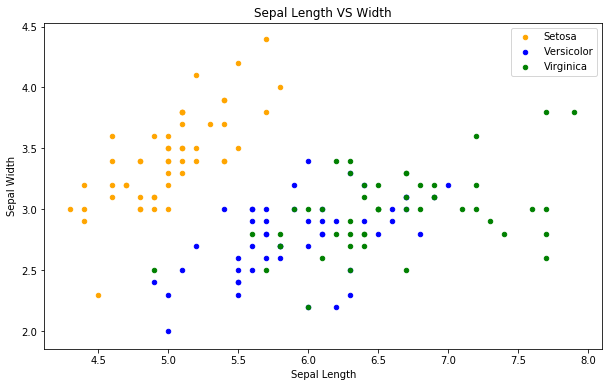

In [60]:
fig = iris[iris.variety=='Setosa'].plot(kind='scatter',x='sepal.length',y='sepal.width',color='orange', label='Setosa')
iris[iris.variety=='Versicolor'].plot(kind='scatter',x='sepal.length',y='sepal.width',color='blue', label='Versicolor', ax=fig)
iris[iris.variety=='Virginica'].plot(kind='scatter',x='sepal.length',y='sepal.width',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

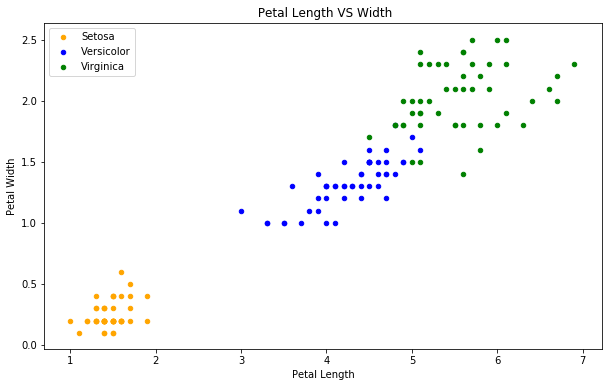

In [61]:
fig = iris[iris.variety=='Setosa'].plot.scatter(x='petal.length',y='petal.width',color='orange', label='Setosa')
iris[iris.variety=='Versicolor'].plot.scatter(x='petal.length',y='petal.width',color='blue', label='Versicolor',ax=fig)
iris[iris.variety=='Virginica'].plot.scatter(x='petal.length',y='petal.width',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

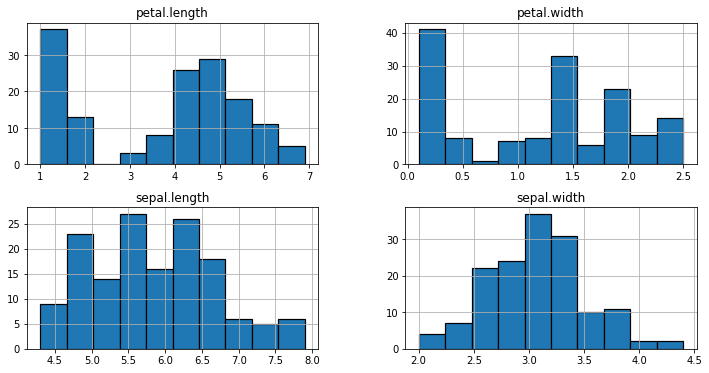

In [62]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

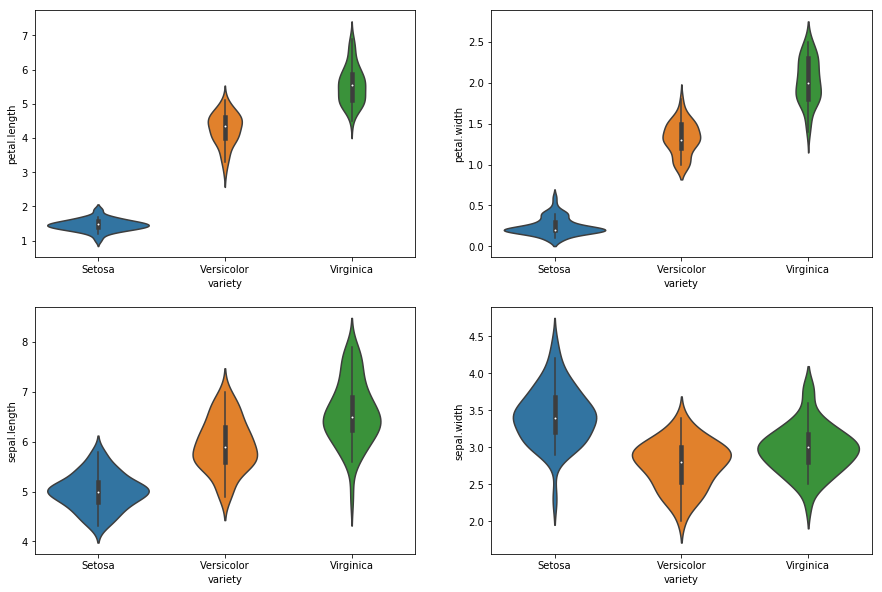

In [63]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='variety',y='petal.length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='variety',y='petal.width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='variety',y='sepal.length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='variety',y='sepal.width',data=iris)

In [65]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [66]:
iris.shape #get the shape of the dataset

(150, 5)

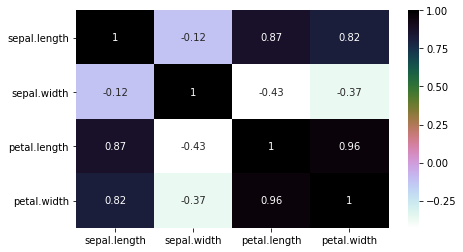

In [67]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [68]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [69]:
train_X = train[['sepal.length','sepal.width','petal.length','petal.width']]# taking the training data features
train_y=train.variety# output of our training data
test_X= test[['sepal.length','sepal.width','petal.length','petal.width']] # taking test data features
test_y =test.variety  #output value of test data

In [70]:
train_X.head(2)

,sepal.length,sepal.width,petal.length,petal.width
22,4.6,3.6,1.0,0.2
116,6.5,3.0,5.5,1.8


In [71]:
test_X.head(2)

,sepal.length,sepal.width,petal.length,petal.width
131,7.9,3.8,6.4,2.0
99,5.7,2.8,4.1,1.3


In [72]:
train_y.head()  ##output of the training data

22         Setosa
116     Virginica
96     Versicolor
26         Setosa
76     Versicolor
Name: variety, dtype: object

<h3>Support Vector Machine (SVM)</h3>

In [73]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9777777777777777


C:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<h3>Logistic Regression</h3>

In [74]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The accuracy of the Logistic Regression is 0.9333333333333333


<h3>Decision Tree</h3>

In [76]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9333333333333333


<h3>K-Nearest Neighbours</h3>

In [77]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9333333333333333


<b>Let's check the accuracy for various values of n for K-Nearest nerighbours</b>

([<matplotlib.axis.XTick at 0x2617ac03b38>,
 <a list of 10 Text xticklabel objects>)

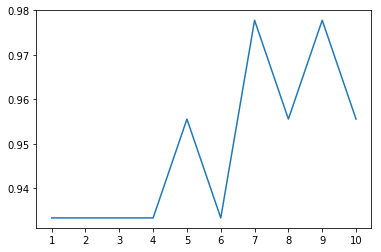

In [78]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

<h3>Creating Petals And Sepals Training Data</h3>

In [79]:
petal=iris[['petal.length','petal.width','variety']]
sepal=iris[['sepal.length','sepal.width','variety']]

In [80]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['petal.width','petal.length']]
train_y_p=train_p.variety
test_x_p=test_p[['petal.width','petal.length']]
test_y_p=test_p.variety


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['sepal.width','sepal.length']]
train_y_s=train_s.variety
test_x_s=test_s[['sepal.width','sepal.length']]
test_y_s=test_s.variety

<h3>SVM</h3>

In [81]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


C:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<h3>Logistic Regression</h3>

In [82]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.6888888888888889
The accuracy of the Logistic Regression using Sepals is: 0.6444444444444445


C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<h3>Decision Tree</h3>

In [83]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


<h3>K-Nearest Neighbours</h3>

In [84]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333
